# SAM 3D Body (3DB) Mesh Alignment to SAM 3D Object Scale

This notebook processes a single 3DB mesh and aligns it to the SAM 3D Object scale.

**Input Data:**
- `images/human_object/image.jpg` - Input image for MoGe
- `meshes/human_object/3DB_results/mask_human.png` - Human mask
- `meshes/human_object/3DB_results/human.ply` - Single 3DB mesh in OpenGL coordinates
- `meshes/human_object/3DB_results/focal_length.json` - 3DB focal length

**Output:**
- `meshes/human_object/aligned_meshes/human_aligned.ply` - Aligned 3DB mesh in OpenGL coordinates

In [1]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from mesh_alignment import process_and_save_alignment

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
PATH = os.getcwd()
print(f"Current working directory: {PATH}")

# Please inference the SAM 3D Body (3DB) Repo (https://github.com/facebookresearch/sam-3d-body) to get the 3DB Results
image_path = f"{PATH}/images/human_object/image.png"
mask_path = f"{PATH}/meshes/human_object/3DB_results/mask_human.png"
mesh_path = f"{PATH}/meshes/human_object/3DB_results/human.ply"
focal_length_json_path = f"{PATH}/meshes/human_object/3DB_results/focal_length.json"
output_dir = f"{PATH}/meshes/human_object/aligned_meshes"
os.makedirs(output_dir, exist_ok=True)


Using device: cuda
Current working directory: /opt/hpcaas/.mounts/fs-0f55b15f5ec0b7262/jiawliu/codebase/codebase/Object/notebook/sam-3d-objects/notebook


## 1. Load and Display Input Data

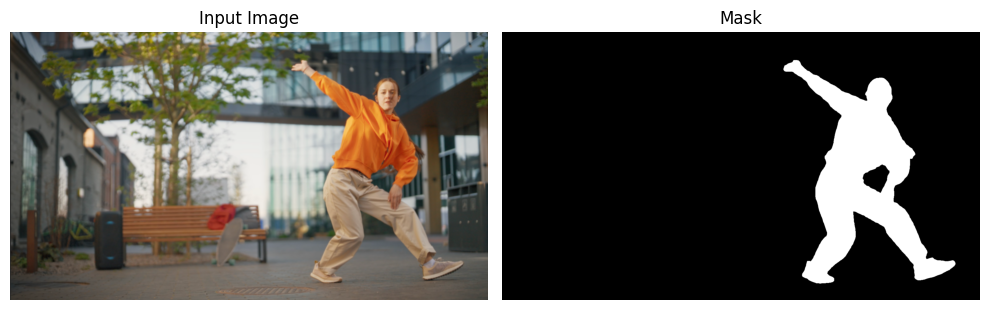

In [2]:
input_image = Image.open(image_path)
mask = Image.open(mask_path).convert('L')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].set_title('Input Image')
axes[0].axis('off')
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## 2. Process and Save Aligned Mesh

In [3]:
from mesh_alignment import process_and_save_alignment

success, output_mesh_path, result = process_and_save_alignment(
    mesh_path=mesh_path,
    mask_path=mask_path,
    image_path=image_path,
    output_dir=output_dir,
    device=device,
    focal_length_json_path=focal_length_json_path
)

if success:
    print(f"Alignment completed successfully! Output: {output_mesh_path}")
else:
    print("Alignment failed!")

[INFO] Starting 3DB mesh alignment pipeline...
[INFO] Processing alignment...
[INFO] Generating MoGe point cloud...


/zfs-home/jiawliu/miniconda3/envs/lidra/lib/python3.10/site-packages/moge/model/v1.py:171: UserWarning: The following deprecated/invalid arguments are ignored: {'output_mask': True, 'split_head': True}
  warnings.warn(f"The following deprecated/invalid arguments are ignored: {deprecated_kwargs}")


[INFO] Loaded focal length from /opt/hpcaas/.mounts/fs-0f55b15f5ec0b7262/jiawliu/codebase/codebase/Object/notebook/sam-3d-objects/notebook/meshes/human_object/3DB_results/focal_length.json: 1623.0897216796875
[INFO] Cropping mesh with mask...
[INFO] Extracting target points...
[INFO] Aligning mesh to point cloud...
[INFO] Alignment completed - Scale: 0.2184, Target points: 103716
 SUCCESS! Saved aligned mesh to: /opt/hpcaas/.mounts/fs-0f55b15f5ec0b7262/jiawliu/codebase/codebase/Object/notebook/sam-3d-objects/notebook/meshes/human_object/aligned_meshes/human_aligned.ply
 Processing complete!
Alignment completed successfully! Output: /opt/hpcaas/.mounts/fs-0f55b15f5ec0b7262/jiawliu/codebase/codebase/Object/notebook/sam-3d-objects/notebook/meshes/human_object/aligned_meshes/human_aligned.ply


## 3. Interactive 3D Visualization


In [4]:
from mesh_alignment import visualize_meshes_interactive

aligned_mesh_path = f"{PATH}/meshes/human_object/aligned_meshes/human_aligned.ply"
dfy_mesh_path = f"{PATH}/meshes/human_object/3Dfy_results/0.glb"

demo, combined_glb_path = visualize_meshes_interactive(
    aligned_mesh_path=aligned_mesh_path,
    dfy_mesh_path=dfy_mesh_path,
    share=True
)

Loading meshes for interactive visualization...
Loaded aligned mesh: 18439 vertices
Loaded 3Dfy mesh: 113498 vertices
Exported combined scene to: /opt/hpcaas/.mounts/fs-0f55b15f5ec0b7262/jiawliu/codebase/codebase/Object/notebook/sam-3d-objects/notebook/meshes/human_object/aligned_meshes/combined_scene.glb
Launching interactive 3D viewer...
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://e309b98a13f798b34d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
